In [1]:
# # Main function to convert TEME coordinates to latitude and longitude
# def teme_to_latlon(x_teme, y_teme, z_teme, datetime_utc):
#     jd = julian_date(datetime_utc)
#     gst = gst_from_julian_date(jd)
#     x_ecef, y_ecef, z_ecef = teme_to_ecef(x_teme, y_teme, z_teme, gst)
#     lat, lon, alt = ecef_to_geodetic(x_ecef, y_ecef, z_ecef)
#     return lat, lon, alt

In [2]:
import json
import pandas as pd
from datetime import datetime

In [3]:
from orbit_predictor.utils import gstime_from_datetime
from orbit_predictor.coordinate_systems import eci_to_ecef, ecef_to_llh

In [4]:
# Read data from csv
position_df=pd.read_csv("data/position_telemetry")

In [5]:
t=position_df.epoch[0]

In [6]:
t=datetime.fromisoformat(t)

In [7]:
x_teme=position_df.position_teme_km_x[0]
y_teme=position_df.position_teme_km_y[0]
z_teme=position_df.position_teme_km_z[0]


In [8]:
gstime_from_datetime(t)

4.57817169508882

In [9]:
coordinates_in_ecef=eci_to_ecef((x_teme,y_teme,z_teme), gstime_from_datetime(t))
print(coordinates_in_ecef)

(-1141.3402316662812, -3951.0495386716284, 5542.3233445429705)


In [10]:
ecef_to_llh(coordinates_in_ecef)

(53.59299252013463, -106.11242671918764, 537.1831324904151)

In [11]:
n=position_df.shape[0]

In [12]:
latitude=[]
longitude=[]
timestamp=[]
for i in range(n):
    t=position_df.epoch[i]
    t=datetime.fromisoformat(t)
    x_teme=position_df.position_teme_km_x[i]
    y_teme=position_df.position_teme_km_y[i]
    z_teme=position_df.position_teme_km_z[i]
    coordinates_in_ecef=eci_to_ecef((x_teme,y_teme,z_teme), gstime_from_datetime(t))
    coordinates_in_lat_long=ecef_to_llh(coordinates_in_ecef)
    timestamp.append(t)
    latitude.append(coordinates_in_lat_long[0])
    longitude.append(coordinates_in_lat_long[1])

/home/esteban/projects/job_interview/.venv/lib/python3.11/site-packages/orbit_predictor/coordinate_systems.py:68: RuntimeWarning: invalid value encountered in scalar divide
  thet = atan(ecef_km[2] * a / (p * b))


In [13]:
dict = {"timestamp":timestamp, "latitude":latitude , "longitude": longitude}

In [14]:
df = pd.DataFrame(dict)

In [15]:
df.head()

,timestamp,latitude,longitude
0,2022-04-08 04:23:34+00:00,53.592993,-106.112427
1,2022-04-08 04:23:44+00:00,54.207126,-106.389614
2,2022-04-08 04:23:54+00:00,54.820699,-106.673873
3,2022-04-08 04:24:04+00:00,55.433688,-106.965577
4,2022-04-08 04:24:14+00:00,56.046065,-107.265130


In [16]:
df.tail()

,timestamp,latitude,longitude
259196,2022-05-08 04:22:54+00:00,-71.815127,60.717890
259197,2022-05-08 04:23:04+00:00,-72.382952,59.814925
259198,2022-05-08 04:23:14+00:00,-72.946749,58.856757
259199,2022-05-08 04:23:24+00:00,-73.506113,57.838177
259200,2022-05-08 04:23:34+00:00,-74.060586,56.753376


In [17]:
df.describe()

,latitude,longitude
count,251557.000000,259201.000000
mean,0.001904,1.344066
std,50.683572,103.731248
min,-82.539022,-179.999840
25%,-44.699820,-87.552399
50%,0.003212,0.000000
75%,44.715752,90.124227
max,82.539030,180.000000


In [18]:
import matplotlib.pyplot as plt


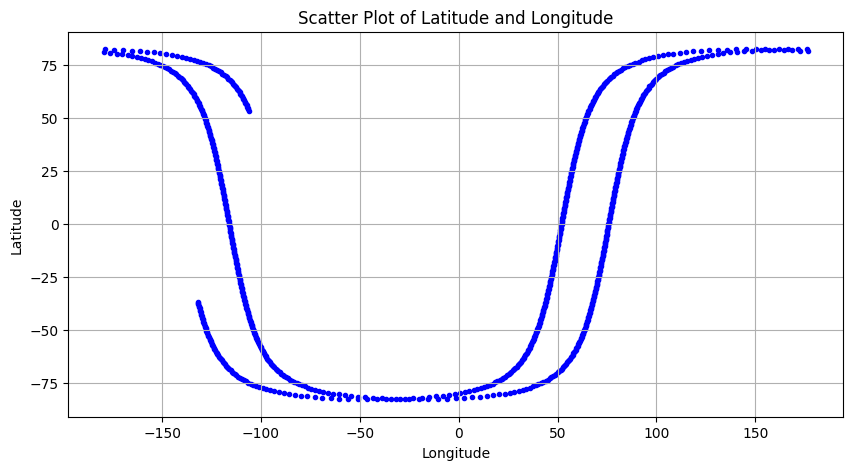

In [19]:
# Create the scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(longitude[0:1000], latitude[0:1000], c='blue',marker='.')#marker='o'

# Add titles and labels
plt.title('Scatter Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Optionally add grid
plt.grid(True)

# Show the plot
plt.show()

In [20]:
utdf=pd.read_pickle("full_data_frame.pkl")

In [21]:
utdf.head()

,id,boot_start_dt,booting_time,active_time,cooldown_time,total_duration,window_end_dt,middle_date
0,0,2022-04-08 04:44:12.581000+00:00,169.994,50.016,19.932,239.942,2022-04-08 04:48:12.523000+00:00,2022-04-08 04:46:12.552000+00:00
1,1,2022-04-08 05:59:13.201000+00:00,190.177,409.878,20.312,620.367,2022-04-08 06:09:33.568000+00:00,2022-04-08 06:04:23.384500+00:00
2,2,2022-04-08 06:23:34.131000+00:00,180.251,430.202,9.868,620.321,2022-04-08 06:33:54.452000+00:00,2022-04-08 06:28:44.291500+00:00
3,3,2022-04-08 07:38:31.795000+00:00,180.050,430.016,9.972,620.038,2022-04-08 07:48:51.833000+00:00,2022-04-08 07:43:41.814000+00:00
4,4,2022-04-08 08:30:49.805000+00:00,179.999,420.086,20.048,620.133,2022-04-08 08:41:09.938000+00:00,2022-04-08 08:35:59.871500+00:00


In [22]:
df.head()

,timestamp,latitude,longitude
0,2022-04-08 04:23:34+00:00,53.592993,-106.112427
1,2022-04-08 04:23:44+00:00,54.207126,-106.389614
2,2022-04-08 04:23:54+00:00,54.820699,-106.673873
3,2022-04-08 04:24:04+00:00,55.433688,-106.965577
4,2022-04-08 04:24:14+00:00,56.046065,-107.265130


In [23]:
df["timestamp"][0] < utdf["middle_date"][0]

True

In [24]:
utdf["middle_date"][0]

Timestamp('2022-04-08 04:46:12.552000+0000', tz='UTC')

In [25]:
rows_telemetry=utdf.shape[0]
rows_lat_long= df.shape[0]
list_lat=[]
list_long=[]
j=0
for i in range(rows_telemetry):
    found=False
    while j < (rows_lat_long-1) and not found:
        low_limit=df["timestamp"][j]        #data from lat long dataframe
        upper_limit=df["timestamp"][j+1]    #data from lat long dataframe
        target= utdf["middle_date"][i]      #data from uptime dataframe
        if (low_limit < target <= upper_limit):
            list_lat.append(df["latitude"][j])
            list_long.append(df["longitude"][j])
            found=True
        j+=1


In [26]:
utdf["latitude"]=list_lat
utdf["longitude"]=list_long

In [27]:
# OBC failed in the booting sequence, in these events there is no uptime of the obc
failed_boots_mask=utdf["active_time"]=="failed"
failed_boots=utdf[failed_boots_mask]

In [28]:
exclude_failed_boots_mask=utdf["active_time"]!="failed"
exclude_failed_boots=utdf[exclude_failed_boots_mask]

In [29]:
# OBC very short active duration less than 25 seconds (not sure it this is a failure)
short_time_mask=exclude_failed_boots["active_time"]<25
short_duration=exclude_failed_boots[short_time_mask]

In [30]:
short_duration

,id,boot_start_dt,booting_time,active_time,cooldown_time,total_duration,window_end_dt,middle_date,latitude,longitude
85,92,2022-04-12 00:45:50.035000+00:00,190.144,20.012,30.124,240.280,2022-04-12 00:49:50.315000+00:00,2022-04-12 00:47:50.175000+00:00,51.655404,147.594959
131,139,2022-04-14 00:00:33.129000+00:00,189.680,20.124,29.981,239.785,2022-04-14 00:04:32.914000+00:00,2022-04-14 00:02:33.021500+00:00,41.178282,-37.184297
167,177,2022-04-15 13:36:40.724000+00:00,190.034,20.159,29.89,240.083,2022-04-15 13:40:40.807000+00:00,2022-04-15 13:38:40.765500+00:00,-70.150672,146.618967
354,384,2022-04-24 04:35:49.907000+00:00,189.926,20.072,29.842,239.840,2022-04-24 04:39:49.747000+00:00,2022-04-24 04:37:49.827000+00:00,67.112781,-117.536173
434,470,2022-04-27 19:08:38.930000+00:00,190.186,19.881,29.973,240.040,2022-04-27 19:12:38.970000+00:00,2022-04-27 19:10:38.950000+00:00,-73.956134,-164.770777
577,627,2022-05-04 08:00:38.253000+00:00,190.188,19.789,30.198,240.175,2022-05-04 08:04:38.428000+00:00,2022-05-04 08:02:38.340500+00:00,-11.230607,27.814750
645,700,2022-05-07 08:30:24.911000+00:00,189.908,19.966,30.197,240.071,2022-05-07 08:34:24.982000+00:00,2022-05-07 08:32:24.946500+00:00,71.610335,178.641418


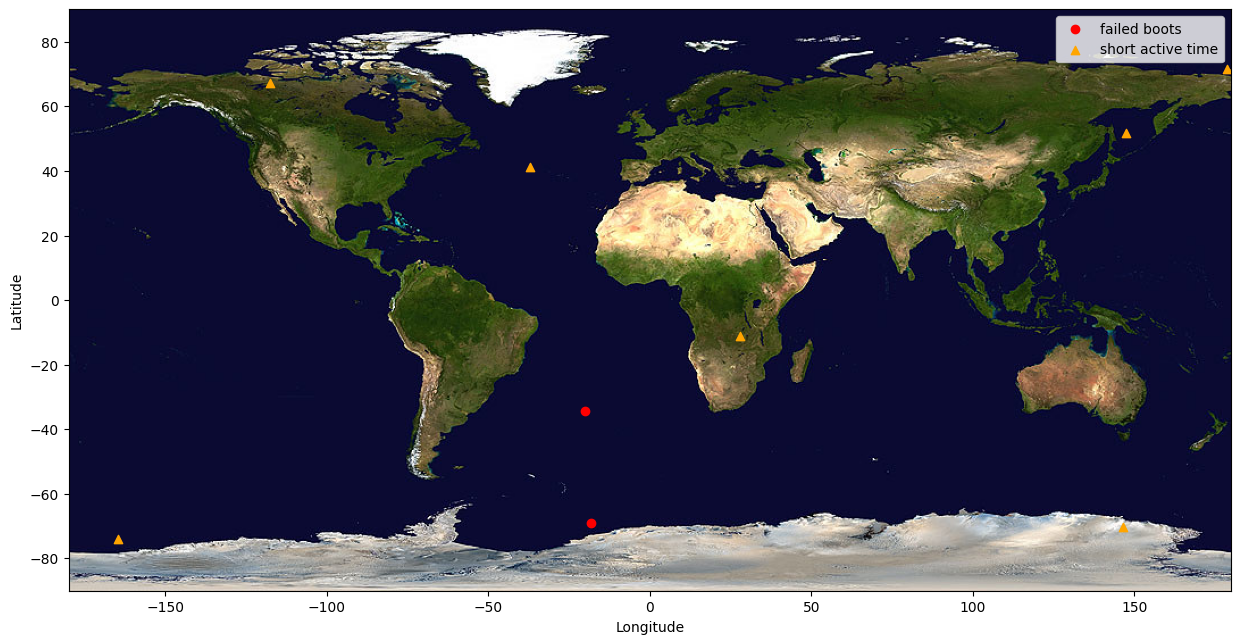

In [31]:
import matplotlib.image as mpimg
# Read the image
img = mpimg.imread('earth_blue_marble.jpg')

# Create the plot
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(failed_boots["longitude"], failed_boots["latitude"], c='red',marker='o',label="failed boots")
ax.scatter(short_duration["longitude"], short_duration["latitude"], c='orange',marker='^',label="short active time")
# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.legend() 

# Display the image
ax.imshow(img, extent=[-180, 180, -90, 90])